<a href="https://colab.research.google.com/github/welricsson/portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, além de ser um negógio totalmente disruptivo pois ele **não possui nenhum hotel**!

<center><img alt="Rio de Janeiro" width="100%" src="https://i.pinimg.com/originals/bd/d8/ec/bdd8ece31bb48c9c389a3fcf3648b511.jpg"></center>

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

A análise que será realizada será referente aos dados da cidade do Rio de Janeiro. Veremos quais insights podem ser extraídos a partir dos dados brutos. O foco da análise será na qualidade dos dados e na validação da hipótese do impacto da pandemia nos preços dos imóveis.

 # Sumário
1. [Introdução](#introduction)
2. [Coleta dos dados](#paragraph1)
3. [Análise dos dados](#paragraph2)
    1. [Quantas variáveis e quantos registros o nosso conjunto de dados possui?](#subparagraph4)
    2. [Qual a porcentagem de valores ausentes no *dataset*?](#subparagraph5)
    3. [Qual o tipo de distribuição das variáveis?](#subparagraph6)
    4. [Há *outliers* presentes?](#subparagraph7)
    5. [Qual a correlação existente entre as variáveis?](#subparagraph8)
    6. [Qual o tipo de imóvel mais alugado no Airbnb?](#subparagraph9)
    7. [Qual a localidade mais cara do dataset?](#subparagraph10)
    8. [Houve impacto nos preços dos imóveis devido a pandemia?](#subparagraph11)
      1. [Plota histograma para verificar a distribuição das variáveis](#subparagraph12)
4. [Conclusão](#paragraph3)

## Introdução <a name="introduction"></a>

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

## Coleta dos Dados <a name="paragraph1"></a>


In [2]:
# importa os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
# importa o arquivo referente ao mês de maio para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv")

## Análise dos Dados <a name="paragraph2"></a>

Nesta etapa vamos entender como os dados estão estruturados e identificar os padrões que compoem o *dataset*. Precisamos também fazer algumas validações básicas como: verificar há duplicidade de registros, a consistência dos dados e avaliar o tipo de distribuição das variáveis.

**Dicionário das variáveis**

Antes de iniciarmos qualquer análise, vamos verificar o dicionário de variáveis e as 5 primeiras entradas do dataframe para termos um panorâma geral.

---

|Variável        |Tipo                      	 |Descrição                         |
|----------------|-------------------------------|-----------------------------|
|`id` 			       			  |int64  |Número de id gerado para identificar o imóvel		  |
|`name` 			   			  |object |Nome da propriedade anunciada                       	  |
|`host_id` 			   			  |int64  |Número de id do proprietário (anfitrião) da propriedade|
|`host_name` 		   			  |object |Nome do anfitrião                                      |
|`neighbourhood_group` 			  |float64|Esta coluna não contém nenhum valor válido             |
|`neighbourhood` 	   			  |object |Nome do bairro                                      	  |
|`latitude` 		   			  |float64|Coordenada da latitude da propriedade                  |
|`longitude` 		   			  |float64|Coordenada da longitude da propriedade                 |
|`room_type` 		   			  |object |Informa o tipo de quarto que é oferecido               |
|`price` 			   			  |int64  |Preço para alugar o imóvel                             |
|`minimum_nights` 	   			  |int64  |Quantidade mínima de noites para reservar              |
|`number_of_reviews`   			  |int64  |Número de reviews que a propriedade possui             |
|`last_review` 		   			  |object |Data do último review                                  |
|`reviews_per_month`   			  |float64|Quantidade de reviews por mês                          |
|`calculated_host_listings_count` |int64  |Quantidade de imóveis do mesmo anfitrião               |
|`availability_365`    			  |int64  |Número de dias de disponibilidade dentro de 365 dias   |

> Os dados do dicionário, com exceção da descrição, foram obtidos a partir do comando `display(df.dtypes)`.


In [35]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


### **1. Quantas variáveis e quantos registros o nosso conjunto de dados possui?** <a name="subparagraph4"></a>

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa (com um volume maior e com mais variáveis) `listings.csv.gz`.

In [36]:
# identificar os seguintes pontos: volume de dados, quantidade de variáveis, quantidade distinta de imóveis, se há duplicidade de registros e se há duplicidade nos campos chave;
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Quantidade distinta de imóveis:\t {}".format(len(df['id'].unique().tolist())))
print("Registros duplicados:\t\t {}".format(df.duplicated().sum()))
print("Campos chave duplicados:\t {}".format(df[['id','host_id']].duplicated().sum()))

Entradas:	 35793
Variáveis:	 16

Quantidade distinta de imóveis:	 35793
Registros duplicados:		 0
Campos chave duplicados:	 0


In [37]:
#Verifica a consistência do campo 'calculated_host_listings_count' pela quantidade de 'host_id'
df_filtro = df[df['host_id'] == 102840]
df_filtro[['host_id','calculated_host_listings_count']]

,host_id,calculated_host_listings_count
2,102840,3
435,102840,3
1472,102840,3


Peguei um `host_id` que possui três hotéis. Podemos ver que a quantidade bate com o valor informado no campo `calculated_host_listings_count`.

In [38]:
print("Quantidade máxima de calculated_host_listings_count:\t {}".format(df_filtro[['host_id','calculated_host_listings_count']].groupby('host_id').max().sum()[0]))
print("Quantidade de host_id:\t {}".format(len(df_filtro.host_id.tolist())))

Quantidade máxima de calculated_host_listings_count:	 3
Quantidade de host_id:	 3


Agora vamos validar a tabela inteira.

In [39]:
#Verifica a consistência do campo 'calculated_host_listings_count'
print("Quantidade máxima de calculated_host_listings_count: {}".format(df[['host_id','calculated_host_listings_count']].groupby('host_id').max().sum()[0]))
print("Quantidade de host_id:\t {}".format(len(df.host_id.tolist())))


Quantidade máxima de calculated_host_listings_count: 35793
Quantidade de host_id:	 35793


As quantidade estão batendo, logo os dados informados pelo campo `calculated_host_listings_count` estão consistentes.

### **2. Qual a porcentagem de valores ausentes no *dataset*?** <a name="subparagraph5"></a>

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [40]:
# ordena de forma decrescente as variáveis por seus valores ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100,2)

neighbourhood_group               100.00
reviews_per_month                  41.65
last_review                        41.65
name                                0.16
host_name                           0.01
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
id                                  0.00
dtype: float64

É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

### **3. Qual o tipo de distribuição das variáveis?** <a name="subparagraph6"></a>

Para identificar a distribuição das variáveis, irei plotar o histograma.

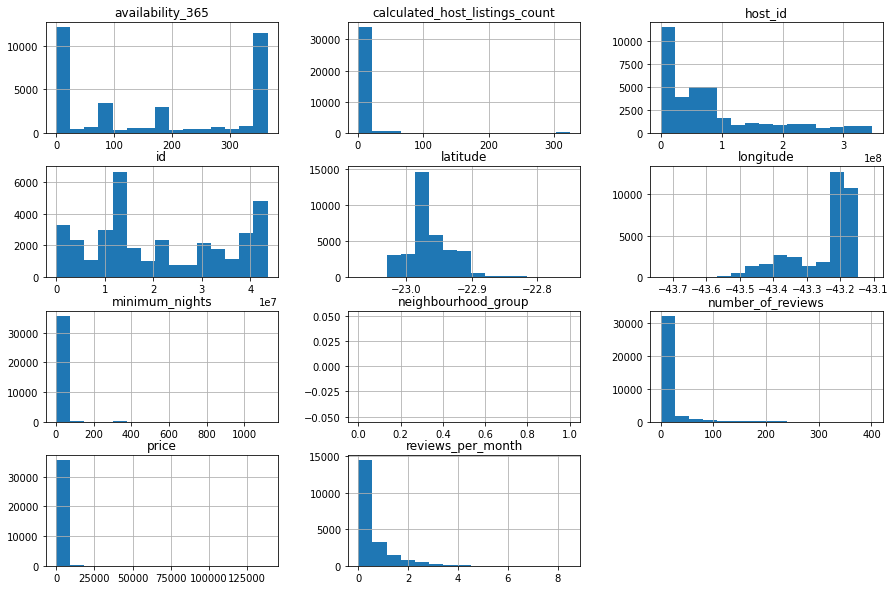

In [41]:
# plota o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **4. Há *outliers* presentes?** <a name="subparagraph7"></a>

A partir da distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.**bold text**

In [42]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35793.000000,35793.000000,35793.000000,20887.000000,35793.000000,35793.000000
mean,795.617858,4.797586,9.747576,0.581955,8.189059,171.900455
std,2452.937585,21.844137,25.828574,0.763331,34.830690,154.647434
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,159.000000,1.000000,0.000000,0.120000,1.000000,0.000000
50%,299.000000,2.000000,1.000000,0.300000,1.000000,160.000000
75%,649.000000,4.000000,6.000000,0.720000,3.000000,362.000000
max,138288.000000,1123.000000,401.000000,8.490000,324.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 649, porém seu valor máximo é 138.288.
* A quantidade máxima da variável `minimum_nights` está acima de 365 dias no ano.

#### Boxplot para minimum_nights

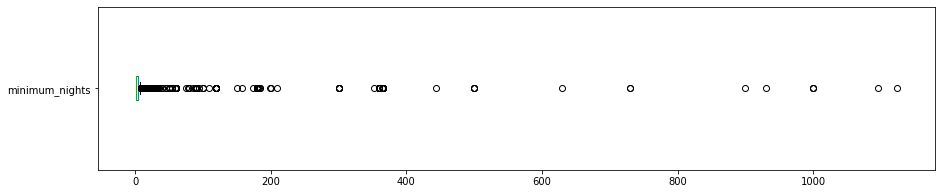

minimum_nights: valores acima de 30:
229 entradas
0.6398%


In [43]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

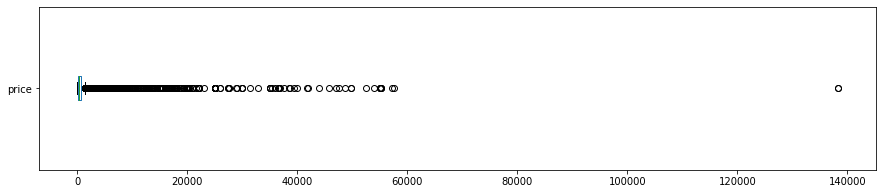


price: valores acima de 1500
3415 entradas
9.5410%


In [44]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

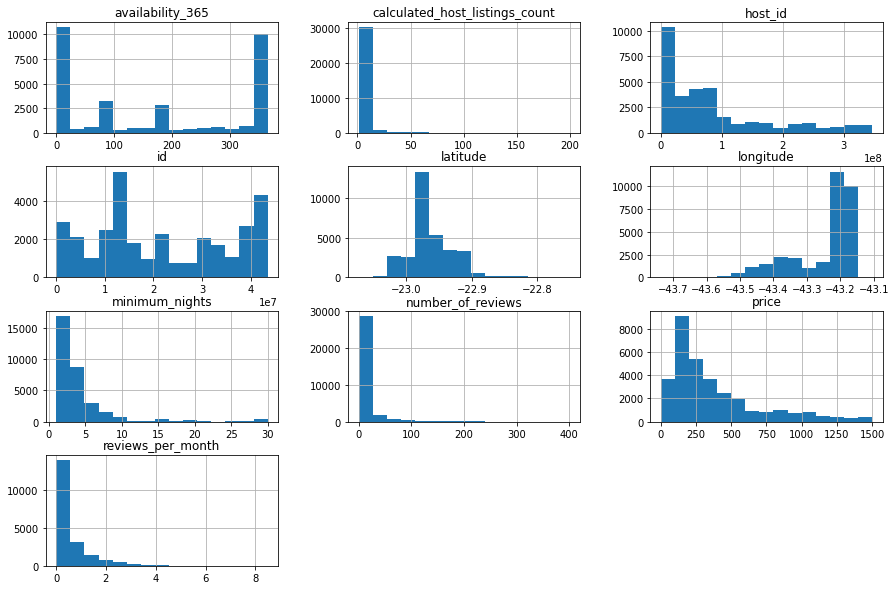

In [46]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **5. Qual a correlação existente entre as variáveis?** <a name="subparagraph8"></a>

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [47]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.150570,-0.161228,-0.165647,0.041941,-0.029684
minimum_nights,0.150570,1.000000,-0.050160,-0.057192,-0.030734,-0.022024
number_of_reviews,-0.161228,-0.050160,1.000000,0.704778,-0.024119,0.049502
reviews_per_month,-0.165647,-0.057192,0.704778,1.000000,-0.014407,-0.021934
calculated_host_listings_count,0.041941,-0.030734,-0.024119,-0.014407,1.000000,0.075923
availability_365,-0.029684,-0.022024,0.049502,-0.021934,0.075923,1.000000


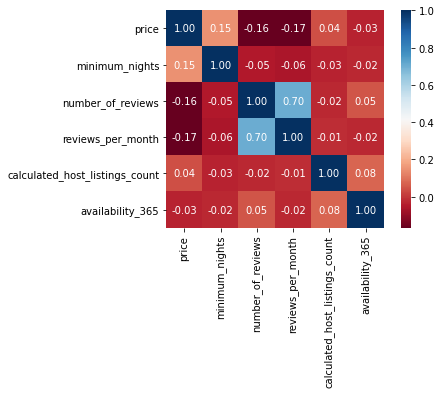

In [48]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Qual o tipo de imóvel mais alugado no Airbnb?** <a name="subparagraph9"></a>

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [49]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22363
Private room        8905
Shared room          751
Hotel room           155
Name: room_type, dtype: int64

In [50]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round((df_clean.room_type.value_counts() / df_clean.shape[0])*100,2)

Entire home/apt    69.51
Private room       27.68
Shared room         2.33
Hotel room          0.48
Name: room_type, dtype: float64

### **7. Qual a localidade mais cara do dataset?** <a name="subparagraph10"></a>

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [51]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  884.333333
Caju                      660.500000
Ricardo de Albuquerque    610.600000
Lagoa                     524.355828
Abolição                  494.000000
Leblon                    493.765255
Alto da Boa Vista         488.525000
Inhoaíba                  480.000000
Jacarepaguá               477.753898
Anchieta                  476.200000
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [52]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2909,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1001,1,0,NaN,NaN,1,0
15766,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1350,15,0,NaN,NaN,1,365
33494,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,302,1,0,NaN,NaN,1,363


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

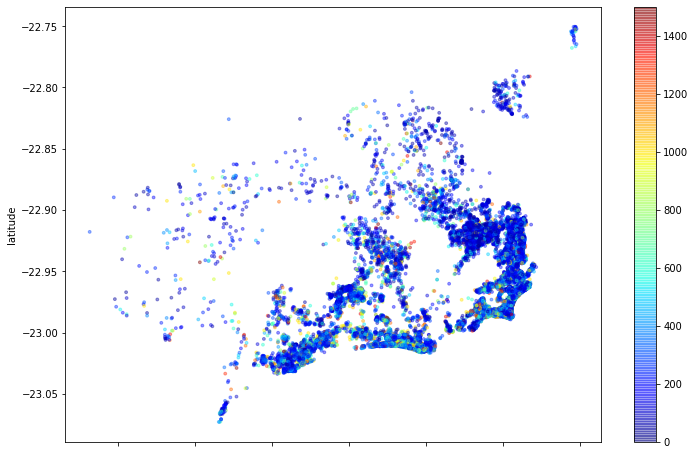

In [53]:
# plotar os imóveis pela latitude-longitude
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **8. [Houve impacto nos preços dos imóveis devido a pandemia ?](https://)**  <a name="subparagraph11"></a>

Uma hipótese que levantei é se a situação de pandemia causada pelo `Covid-19` chegou a afetar o preço dos imóveis no período observado.

O período de observação será de **Janeiro a maio** entre os anos de **2019** e **2020**.

Como este tipo de arquivo disponibilizado pela Airbnb é por mês foi necessário importar cada um dos arquivos para seus respectivs dataframes. 




In [3]:
# importa os arquivos 'listings.csv' dos anos de 2019 e 2020 no mesmo período para um DataFrame

#Dados de 2019
df_201901 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-01-18/visualisations/listings.csv")
df_201902 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-02-11/visualisations/listings.csv")
df_201903 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-03-13/visualisations/listings.csv")
df_201904 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-04-16/visualisations/listings.csv")
df_201905 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-05-21/visualisations/listings.csv")
#Dados de 2020
df_202001 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/visualisations/listings.csv")
df_202002 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-02-25/visualisations/listings.csv")
df_202003 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-03-18/visualisations/listings.csv")
df_202004 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")
df_202005 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv")

In [4]:
#Adiciona uma nova variável com o mês de referencia do arquivo
df_201901['mes_ref'] = '2019-01'
df_201902['mes_ref'] = '2019-02'
df_201903['mes_ref'] = '2019-03'
df_201904['mes_ref'] = '2019-04'
df_201905['mes_ref'] = '2019-05'

df_202001['mes_ref'] = '2020-01'
df_202002['mes_ref'] = '2020-02'
df_202003['mes_ref'] = '2020-03'
df_202004['mes_ref'] = '2020-04'
df_202005['mes_ref'] = '2020-05'

Após a importação uni os arquivos em um único dataframe atribuindo o seu respectivo ano mês.  

In [5]:
#Defini lista 
df_lista = [df_201901,df_201902,df_201903,df_201904,df_201905,df_202001,df_202002,df_202003,df_202004,df_202005]

#Junta Dataframes
df_anomes = pd.concat(df_lista, ignore_index=True)

#Reordena índice de acordo com os campos 'host_id' e 'mes_ref' 
df_anomes = df_anomes.sort_values(by=['host_id','mes_ref'],ignore_index=True)

In [6]:
#Apaga variáveis que não serão mais necessárias para a análise
df_anomes.drop(['name','neighbourhood_group','latitude','longitude','number_of_reviews','last_review','reviews_per_month'], axis=1, inplace=True)

df_anomes_clean = df_anomes.copy()
df_anomes_clean.drop(df_anomes_clean[df_anomes_clean.price > 1500].index, axis=0, inplace=True)
df_anomes_clean.drop(df_anomes_clean[df_anomes_clean.minimum_nights > 30].index, axis=0, inplace=True)

Plota histograma para verificar a distribuição das variáveis. <a name="subparagraph12"></a>

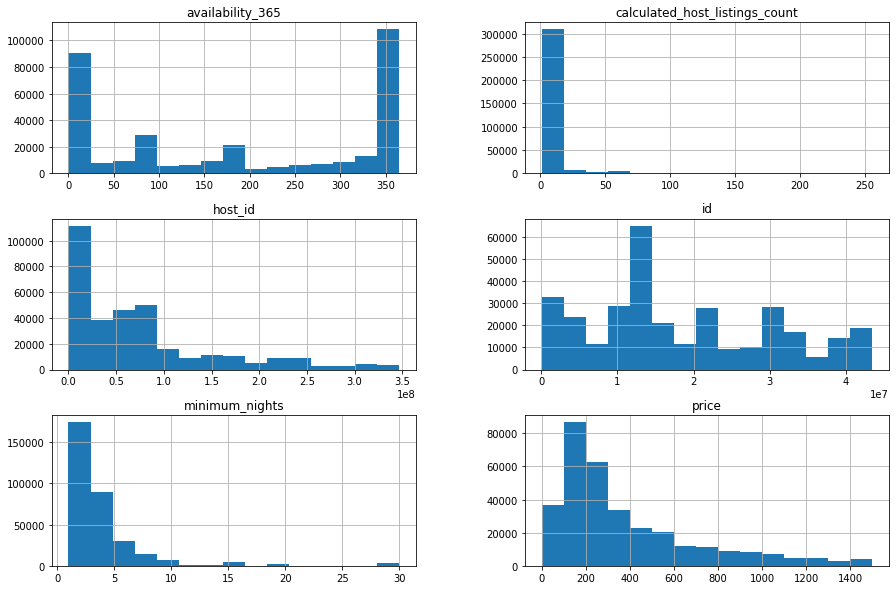

In [7]:
# plotar o histograma para as variáveis numéricas
df_anomes_clean.hist(bins=15, figsize=(15,10));

In [9]:
df_anomes_clean[df_anomes_clean['mes_ref']=='2020-05'].price.sum()

12157937

In [10]:
df_anomes_clean['ano'] = pd.DataFrame(df_anomes_clean.mes_ref.str[:4])
df_anomes_clean['mes'] = pd.to_datetime(df_anomes_clean.mes_ref.str[5:7], format='%m').dt.month_name().str.slice(stop=3)
df_anomes_clean['mes_n'] = pd.DataFrame(df_anomes_clean.mes_ref.str[5:7].astype(str).astype(int))

In [11]:
df_anomes_clean['price_2019'] = pd.DataFrame(df_anomes_clean[df_anomes_clean['ano']=='2019'].price)
df_anomes_clean['price_2020'] = pd.DataFrame(df_anomes_clean[df_anomes_clean['ano']=='2020'].price)

In [12]:
df_anomes_clean.head()

,id,host_id,host_name,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,mes_ref,ano,mes,mes_n,price_2019,price_2020
0,4855561,2616,Horacio,Laranjeiras,Private room,90,1,1,90,2019-01,2019,Jan,1,90.0,NaN
1,4855561,2616,Horacio,Laranjeiras,Private room,90,1,1,82,2019-02,2019,Feb,2,90.0,NaN
2,4855561,2616,Horacio,Laranjeiras,Private room,92,1,1,90,2019-03,2019,Mar,3,92.0,NaN
3,4855561,2616,Horacio,Laranjeiras,Private room,89,1,1,90,2019-04,2019,Apr,4,89.0,NaN
4,4855561,2616,Horacio,Laranjeiras,Private room,90,1,1,90,2019-05,2019,May,5,90.0,NaN


In [13]:
df_anomes_price = df_anomes_clean.groupby(['mes_n','mes'])['price_2019','price_2020'].mean().sort_values(by=['mes_n'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
#df_anomes_price.drop(index='mes_n')
df_anomes_price = df_anomes_price.reset_index(level=0, drop=True)

In [15]:
df_anomes_price

,price_2019,price_2020
mes,,
Jan,390.363553,385.790245
Feb,390.867293,372.686626
Mar,384.456956,368.206688
Apr,381.698188,373.568055
May,371.639210,377.880804


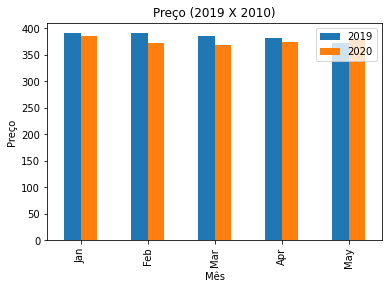

In [17]:
df_anomes_price.plot(kind='bar')
plt.title('Preço (2019 X 2010)')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.legend(('2019', '2020'))
#plt.yticks(np.arange(369, 391, 5))
plt.show()

In [27]:
df_percent = pd.DataFrame(((df_anomes_price.price_2020 - df_anomes_price.price_2019) / df_anomes_price.price_2019))
df_percent.rename(columns={0: '%'}, inplace = True)
df_percent

,%
mes,
Jan,-0.011716
Feb,-0.046514
Mar,-0.042268
Apr,-0.021300
May,0.016795


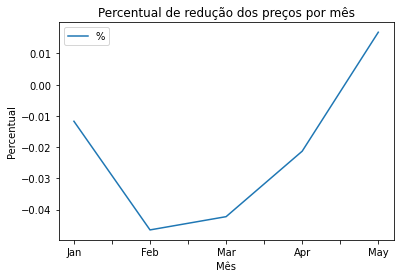

In [33]:
df_percent.plot()
plt.title('Percentual de redução dos preços por mês')
plt.xlabel('Mês')
plt.ylabel('Percentual')
plt.show()

Observando os dois gráficos e o percentual de diferença entre os anos podemos notar que não ocorreu uma diminuição considerável dos preços como eu havia cogitado. No mês de maio, inclusive, chega a ter preços maiores em comparação com maio do ano passado.

## Conclusões <a name="paragraph3"></a>

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

A hipótese de que os preços dos imóveis poriam ter abaixado devido a pandemia não se confirmou.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.